### Ramen Ratings

Что содержит в себе хороший рамен? Попробуйте определить это не только дегустациями, но и с помощью анализа данных. В датасет Ramen Ratings вошло более 2500 ревью на рамены. Используйте эти данные, чтобы выявить идеальный рамен! Вдруг результаты пригодятся вам и в жизни?

In [288]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use ('dark_background')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 6
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 6
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [289]:
file_path = '../data/ramen-ratings.csv'
df = pd.read_csv(file_path, sep=',')
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [290]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [291]:
try: 
    df['Stars'] = pd.to_numeric(df['Stars'].apply(lambda x: x.replace(",", ".") if isinstance(x, str) else x), errors='coerce')
except:
    print("Невозможно перевести значения столбца в числовой")

In [292]:
object_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

In [293]:
df[object_columns].describe(include='object')

,Brand,Variety,Style,Country,Top Ten
count,2580,2580,2578,2580,41
unique,355,2413,7,38,38
top,Nissin,Beef,Pack,Japan,\n
freq,381,7,1531,352,4


In [294]:
df[numeric_columns].describe()

,Review #,Stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [295]:
top_ten = df.copy()
top_ten = top_ten.dropna(subset=['Top Ten'])
top_ten.loc[:, 'Year'] = top_ten['Top Ten'].str.split(' ').str[0]
top_ten.loc[:, 'Rating'] = top_ten['Top Ten'].str.split('#').str[1]
top_ten.drop(columns=['Top Ten'], axis=1, inplace=True)
top_ten = top_ten.dropna(subset=['Rating'])
top_ten['Rating'] = pd.to_numeric(top_ten['Rating'], errors='coerce')
top_ten = top_ten.sort_values(by=['Rating'])
top_ten

,Review #,Brand,Variety,Style,Country,Stars,Year,Rating
1080,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5.00,2015,1
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016,1
1493,1087,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,2014,1
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.00,2013,1
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.00,2012,1
1589,991,Prima Taste,Singapore Curry La Mian,Pack,Singapore,5.00,2013,2
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.00,2012,2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.00,2012,3
1865,715,Indomie,Mi Goreng Rendang (Import),Pack,Indonesia,5.00,2013,3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012,4


In [296]:
top_ten.groupby('Year')['Rating'].size().to_frame()

,Rating
Year,
2012,9
2013,7
2014,8
2015,7
2016,6


In [297]:
df['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [298]:
top_ten['Style'].unique()

array(['Pack', 'Tray'], dtype=object)

In [299]:
top_ten.groupby(['Brand', 'Country']).size().sort_values(ascending=False).to_frame()

,,0
Brand,Country,
Prima Taste,Singapore,5
Indomie,Indonesia,3
Mama,Thailand,3
MyKuali,Malaysia,3
Myojo,Japan,2
Nongshim,South Korea,2
Sapporo Ichiban,Japan,2
Mamee,Malaysia,2
Paldo,South Korea,2


In [300]:
df.loc[:, 'Year'] = df['Top Ten'].str.split(' ').str[0]
df.loc[:, 'Rating'] = df['Top Ten'].str.split('#').str[1]
df.drop(columns=['Top Ten'], axis=1, inplace=True)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.drop(columns=['Year'], axis=1)
df['Rating'] = df['Rating'].fillna(-1)
df

,Review #,Brand,Variety,Style,Country,Stars,Rating
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,-1.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,-1.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,-1.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,-1.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,-1.0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,-1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,-1.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,-1.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,-1.0


In [301]:
df['Style'] = df['Style'].fillna(df['Style'].mode()[0])

In [302]:
grouped_means = df.groupby(['Country', 'Brand'])['Stars'].transform('mean')
df['Stars'] = df['Stars'].fillna(grouped_means)

In [303]:
df.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Rating      0
dtype: int64

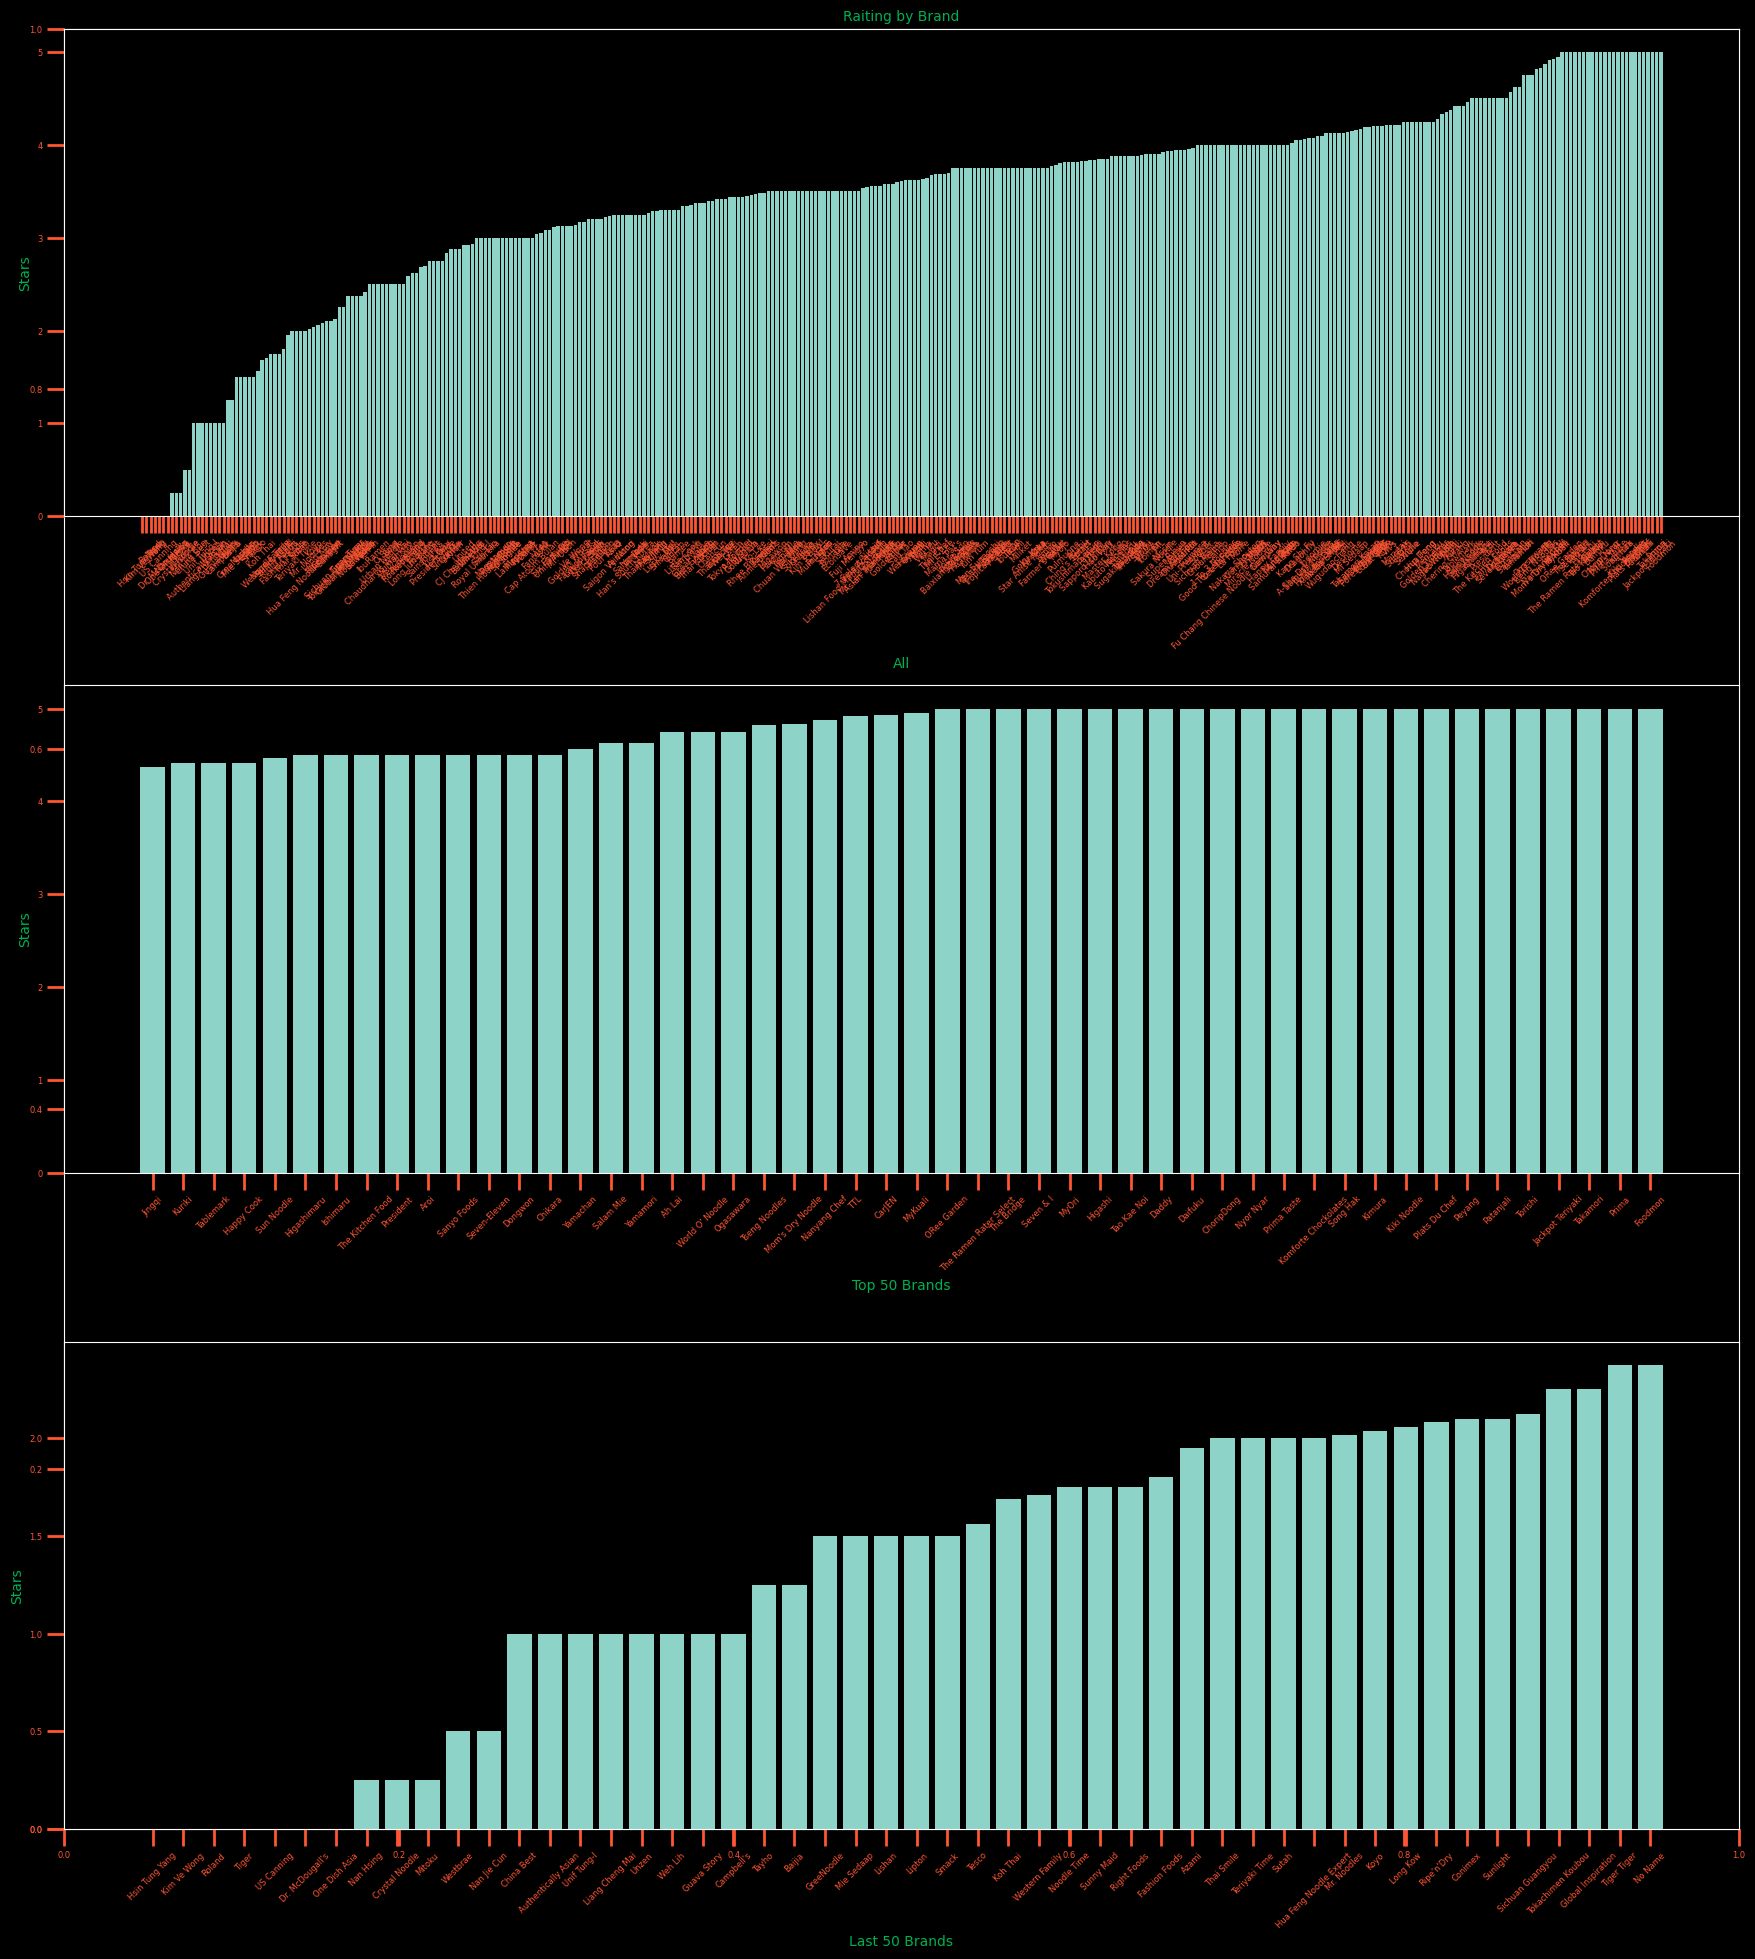

In [304]:
fig = plt.figure()
fig.set_size_inches(18, 20)

brand = df.groupby('Brand')['Stars'].mean()
brand = brand.sort_values()

plt.title('Raiting by Brand')

plt.subplot(3, 1, 1)
plt.bar(brand.index, brand)
plt.xlabel('All')
plt.ylabel('Stars')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
brand_last_50 = brand[-50:]
plt.bar(brand_last_50.index, brand_last_50)
plt.xlabel('Top 50 Brands')
plt.ylabel('Stars')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
brand_first_50 = brand[:50]
plt.bar(brand_first_50.index, brand_first_50)
plt.xlabel('Last 50 Brands')
plt.ylabel('Stars')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

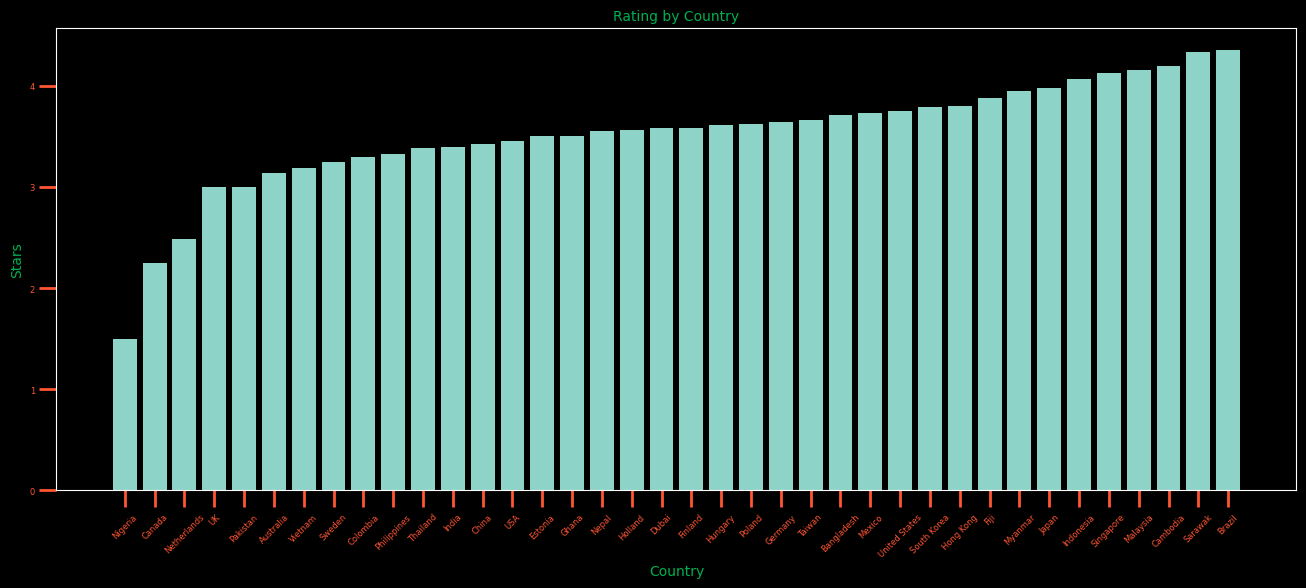

In [305]:
country = df.groupby('Country')['Stars'].mean()
country = country.sort_values()

fig = plt.figure()
fig.set_size_inches(16, 6)

plt.title('Rating by Country')

plt.bar(country.index, country)
plt.xlabel('Country')
plt.ylabel('Stars')
plt.xticks(rotation=45)
plt.show

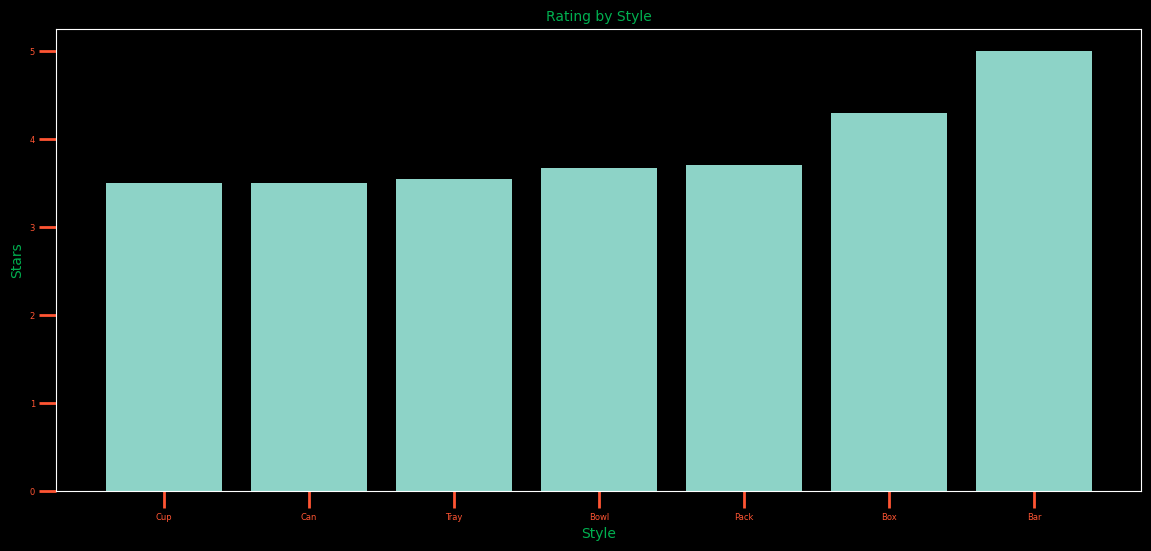

In [306]:
style = df.groupby('Style')['Stars'].mean()
style = style.sort_values()

fig = plt.figure()
fig.set_size_inches(14, 6)

plt.title('Rating by Style')

plt.bar(style.index, style)
plt.xlabel('Style')
plt.ylabel('Stars')

plt.show()

E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_9\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_9\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39178 (\N{CJK UNIFIED IDEOGRAPH-990A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_9\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_9\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.c

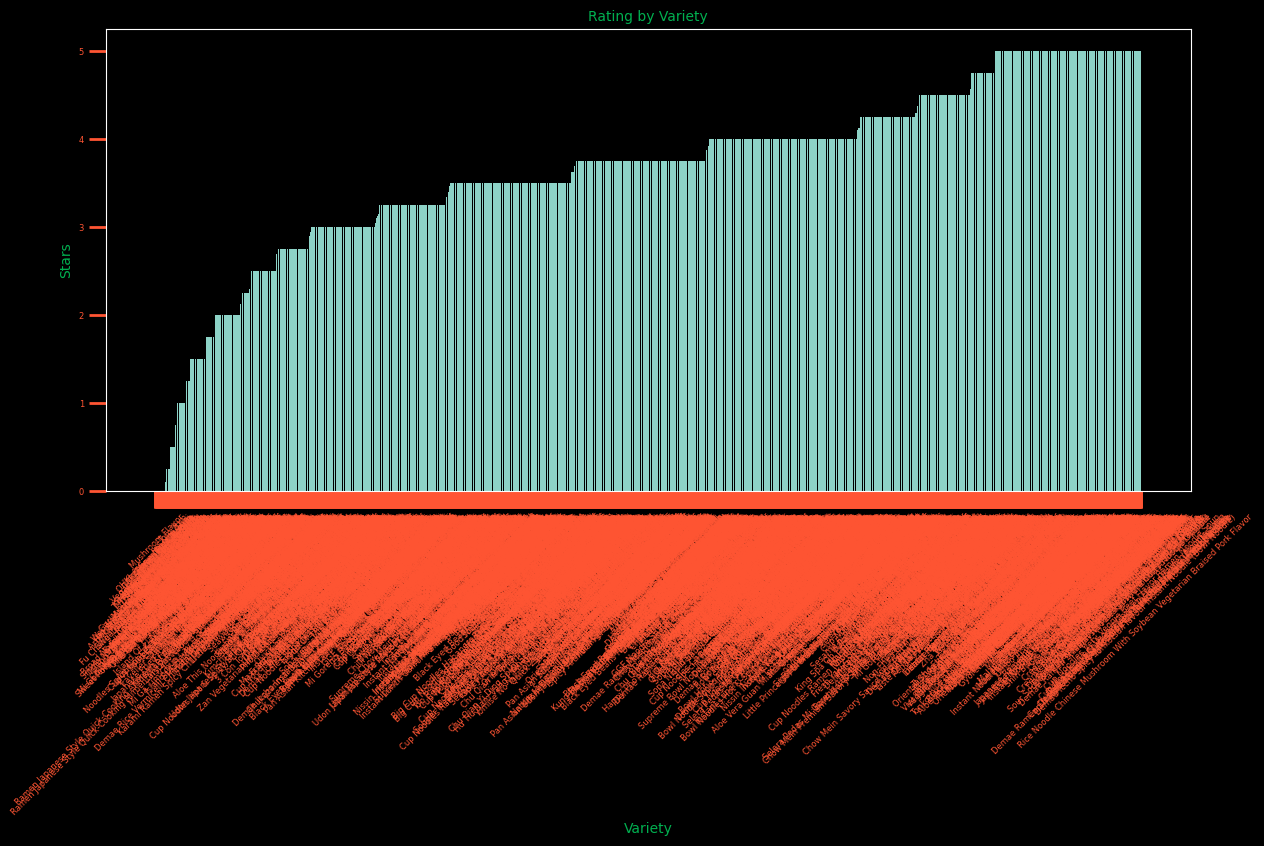

In [307]:
variety = df.groupby('Variety')['Stars'].mean()
variety = variety.sort_values()

fig = plt.figure()
fig.set_size_inches(14, 6)

plt.title('Rating by Variety')

plt.bar(variety.index, variety)
plt.xlabel('Variety')
plt.ylabel('Stars')
plt.xticks(rotation = 45)

plt.show()

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd

# Загрузка данных
data = pd.read_csv('data.csv')

# Создание новых признаков на основе кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

new_features = []

for train_index, test_index in kf.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    
    for feature in ['feature1', 'feature2', 'feature3']:
        feature_mean = train_data.groupby(feature)['target'].mean()
        test_data[f'{feature}_mean'] = test_data[feature].map(feature_mean)
    
    new_features.append(test_data[['feature1_mean', 'feature2_mean', 'feature3_mean']])

# Объединение новых признаков
new_features_concat = pd.concat(new_features)

# Усреднение по новым признакам для каждого объекта
final_features = new_features_concat.groupby(new_features_concat.index).mean()